In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
airpass = pd.read_csv('AirPassengers.csv')

In [3]:
airpass

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
airpass.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
airpass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
airpass.Month = pd.to_datetime(airpass.Month, infer_datetime_format = True)

C:\Users\revad\AppData\Local\Temp\ipykernel_33372\4126036320.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  airpass.Month = pd.to_datetime(airpass.Month, infer_datetime_format = True)


In [7]:
airpass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
airpass = airpass.set_index(['Month'])

In [9]:
airpass

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
# It's a univariate time series and now we check for the stationary - our main assumption for timeseries

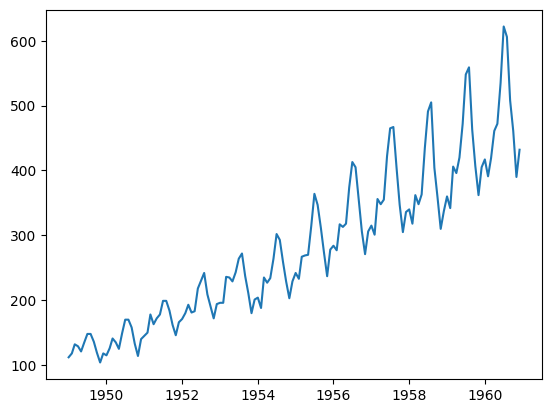

In [10]:
plt.plot(airpass)

In [ ]:
# It's not stationary

In [ ]:
# We try to make it stationary using the differencing technique

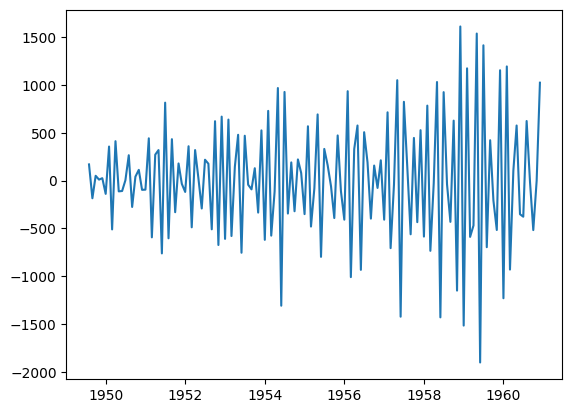

In [11]:
plt.plot(airpass.diff().diff().diff().diff().diff().diff().diff())

In [ ]:
# Still stationarity is not achieved.

In [ ]:
# The solution we have is to take the log of the series

In [12]:
airpass_log = np.log(airpass)

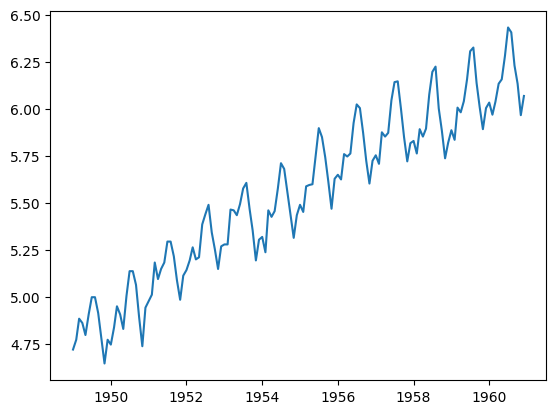

In [13]:
plt.plot(airpass_log)

In [ ]:
# Variance is fine but the mean is still changing
# So we perform differencing.

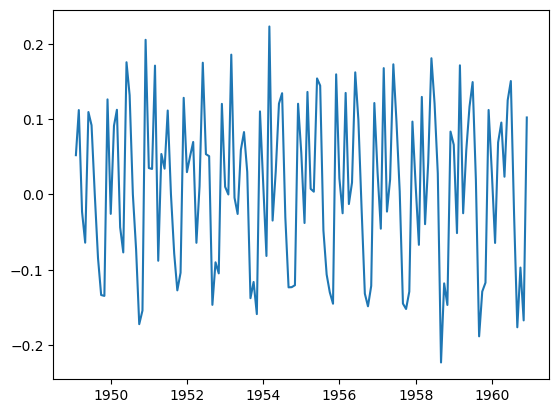

In [14]:
plt.plot(airpass_log.diff())

In [15]:
# d=1 

# Series is stationary at first level of differencing

In [ ]:
# To find p & q values using acf, pacf

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

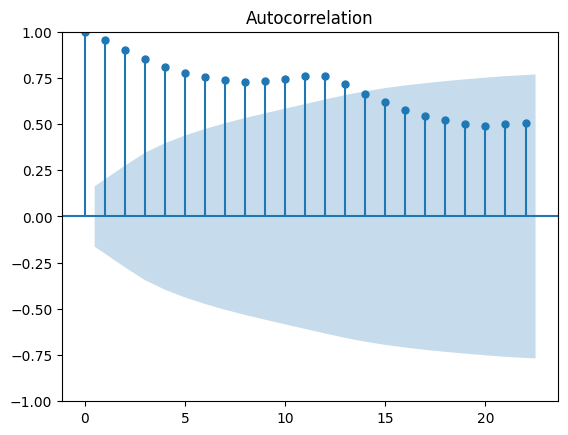

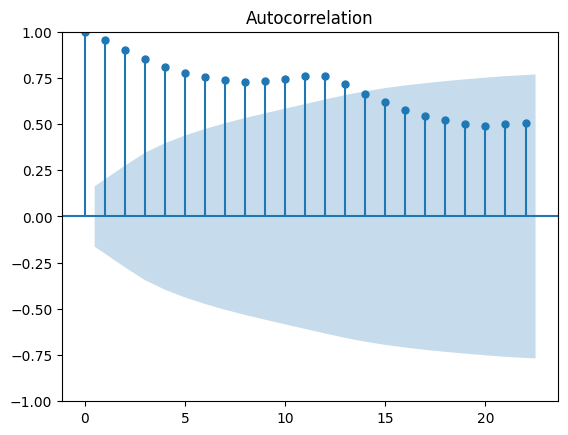

In [17]:
plot_acf(airpass_log)

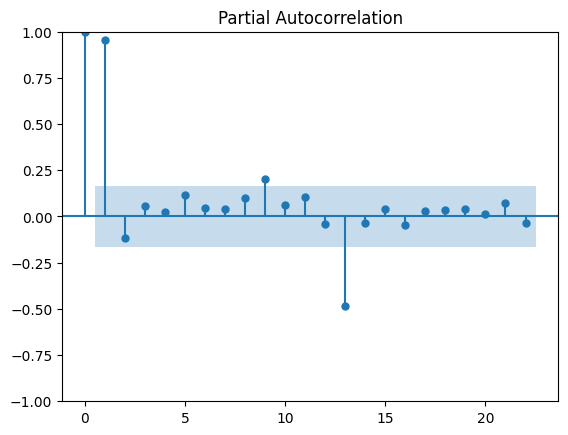

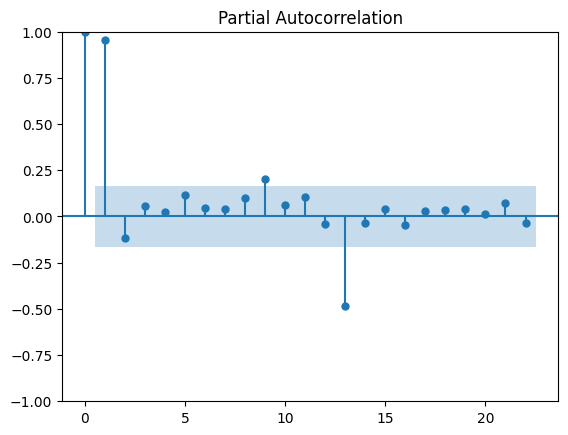

In [18]:
plot_pacf(airpass_log)

In [19]:
# AR(2) process

# p=2, q=0

In [20]:
# p=2, d=1, q=0

In [ ]:
# to check for the patterns/seasonality factor:

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
result = seasonal_decompose(airpass_log)

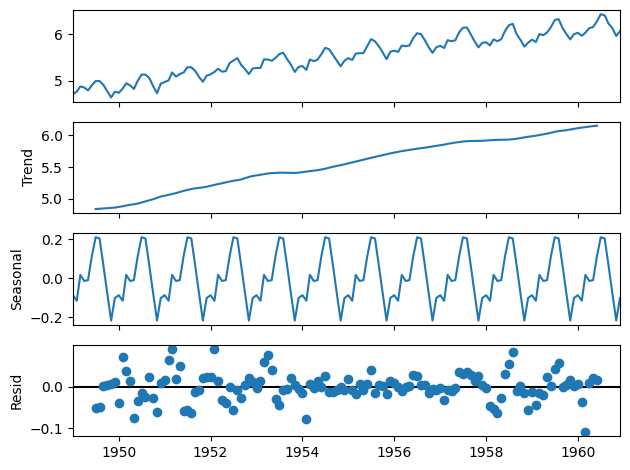

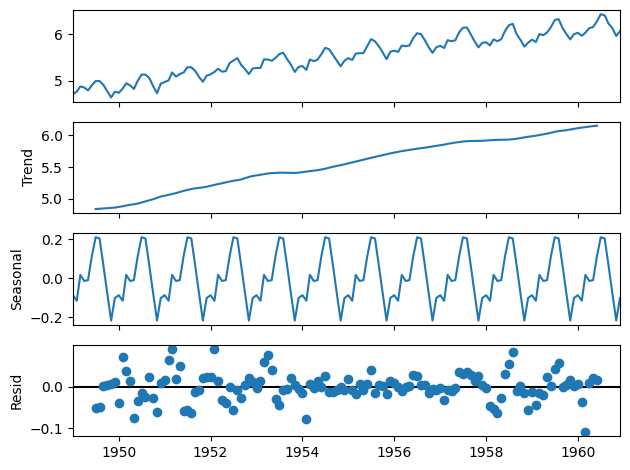

In [23]:
result.plot()

In [ ]:
# trend=uptrend , seasonality = true

In [ ]:
# We can build the model on SARIMAX as well as on the updated ARIMA

In [ ]:
#For that we first need to use auto_arima

In [24]:
import pmdarima
from pmdarima import auto_arima

In [25]:
auto_arima(airpass_log, m=12, seasonal=True)

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [ ]:
# Using these values derived from auto arima in our models

In [ ]:
# On SARIMAX

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [27]:
sarimax = SARIMAX(airpass_log, order=(2,0,0), seasonal_order=(0,1,1,12))

D:\Software\Anaconda\envs\py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Software\Anaconda\envs\py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [28]:
sarimax_model = sarimax.fit()

D:\Software\Anaconda\envs\py310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
pred_values = sarimax_model.predict(start=144, end=155)
pred_values

1961-01-01    6.103811
1961-02-01    6.045856
1961-03-01    6.162774
1961-04-01    6.188848
1961-05-01    6.220836
1961-06-01    6.355857
1961-07-01    6.493052
1961-08-01    6.487465
1961-09-01    6.308099
1961-10-01    6.191124
1961-11-01    6.044448
1961-12-01    6.147807
Freq: MS, Name: predicted_mean, dtype: float64

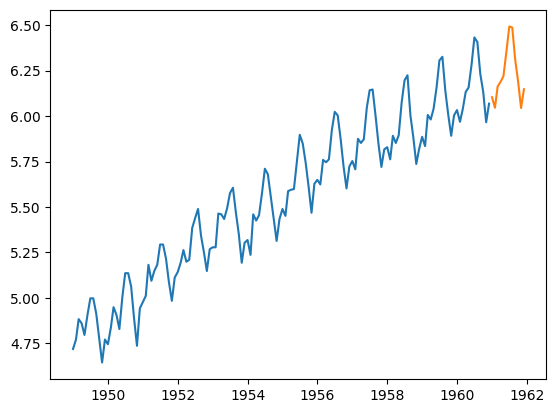

In [30]:
plt.plot(airpass_log)
plt.plot(pred_values)

In [31]:
pred_values1 = np.exp(pred_values)
pred_values1

1961-01-01    447.560233
1961-02-01    422.359343
1961-03-01    474.743071
1961-04-01    487.284393
1961-05-01    503.123563
1961-06-01    575.855527
1961-07-01    660.536421
1961-08-01    656.855795
1961-09-01    549.000278
1961-10-01    488.394630
1961-11-01    421.765015
1961-12-01    467.690792
Freq: MS, Name: predicted_mean, dtype: float64

In [32]:
pred_values1 = np.round(pred_values1)
pred_values1

1961-01-01    448.0
1961-02-01    422.0
1961-03-01    475.0
1961-04-01    487.0
1961-05-01    503.0
1961-06-01    576.0
1961-07-01    661.0
1961-08-01    657.0
1961-09-01    549.0
1961-10-01    488.0
1961-11-01    422.0
1961-12-01    468.0
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
# Plotting the actual and forecasted values:

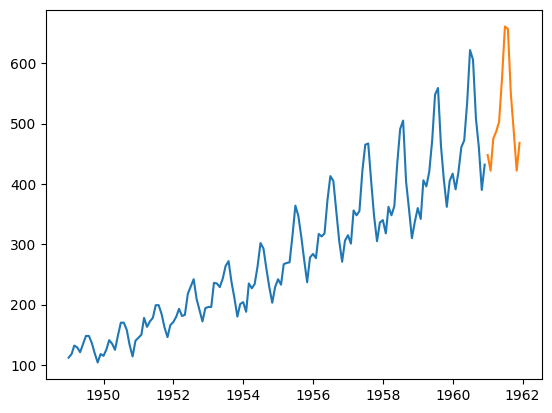

In [33]:
plt.plot(airpass)
plt.plot(pred_values1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      12 non-null     datetime64[ns]
 1   Predicted  0 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 320.0 bytes


In [38]:
df = pd.DataFrame()

In [39]:
df['Predicted'] = pred_values1

In [42]:
df['Month'] = ['1961-01-01','1961-02-01','1961-03-01','1961-04-01','1961-05-01','1961-06-01','1961-07-01','1961-08-01','1961-09-01','1961-10-01','1961-11-01','1961-12-01']

In [43]:
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format = True)

C:\Users\revad\AppData\Local\Temp\ipykernel_33372\2561325327.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format = True)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 1961-01-01 to 1961-12-01
Freq: MS
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Predicted  12 non-null     float64       
 1   Month      12 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 288.0 bytes


<Axes: xlabel='Month'>

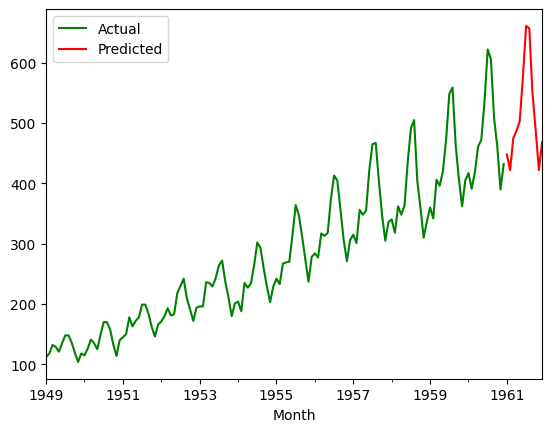

In [45]:
airpass['Passengers'].plot(legend=True, label='Actual', color='green')
df['Predicted'].plot(legend=True, label='Predicted',color='red')

In [ ]:
# Using updated ARIMA model which can handle seasonality.
# On updated ARIMA

In [46]:
from statsmodels.tsa.arima.model import ARIMA

In [49]:
arima = ARIMA(airpass_log, order=(2,0,0), seasonal_order=(0,1,1,12))

D:\Software\Anaconda\envs\py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Software\Anaconda\envs\py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Software\Anaconda\envs\py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [50]:
arima_model = arima.fit()

D:\Software\Anaconda\envs\py310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
pred_values = arima_model.predict(start=144,end=155)
pred_values

1961-01-01    6.103811
1961-02-01    6.045856
1961-03-01    6.162774
1961-04-01    6.188848
1961-05-01    6.220836
1961-06-01    6.355857
1961-07-01    6.493052
1961-08-01    6.487465
1961-09-01    6.308099
1961-10-01    6.191124
1961-11-01    6.044448
1961-12-01    6.147807
Freq: MS, Name: predicted_mean, dtype: float64

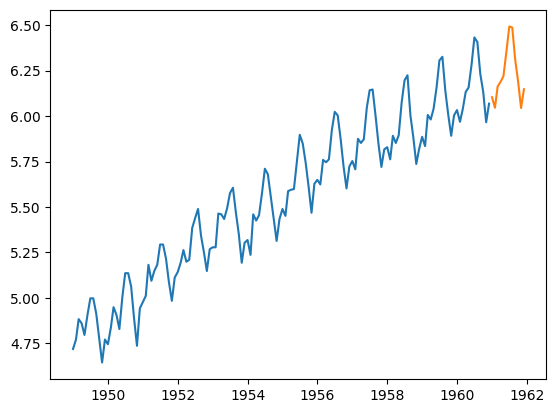

In [53]:
plt.plot(airpass_log)
plt.plot(pred_values)

In [54]:
pred_values1 = np.exp(pred_values)
pred_values1 = np.round(pred_values1)
pred_values1

1961-01-01    448.0
1961-02-01    422.0
1961-03-01    475.0
1961-04-01    487.0
1961-05-01    503.0
1961-06-01    576.0
1961-07-01    661.0
1961-08-01    657.0
1961-09-01    549.0
1961-10-01    488.0
1961-11-01    422.0
1961-12-01    468.0
Freq: MS, Name: predicted_mean, dtype: float64

In [55]:
df1 = pd.DataFrame()

In [56]:
df1['Predicted'] = pred_values1

In [57]:
df['Month'] = ['1961-01-01','1961-02-01','1961-03-01','1961-04-01','1961-05-01','1961-06-01','1961-07-01','1961-08-01','1961-09-01','1961-10-01','1961-11-01','1961-12-01']

In [58]:
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)

C:\Users\revad\AppData\Local\Temp\ipykernel_33372\269620981.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 1961-01-01 to 1961-12-01
Freq: MS
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Predicted  12 non-null     float64       
 1   Month      12 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 288.0 bytes


<Axes: xlabel='Month'>

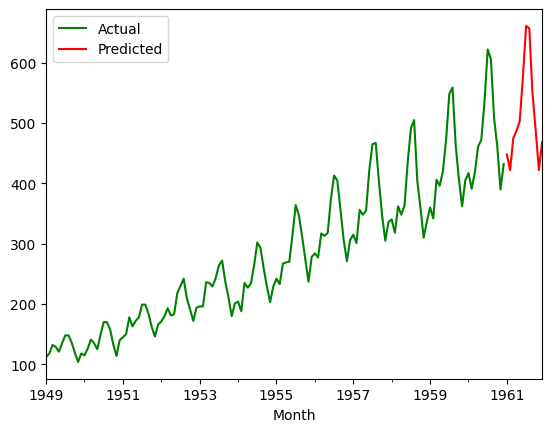

In [60]:
airpass['Passengers'].plot(legend=True, label="Actual", color='green')
df['Predicted'].plot(legend=True, label='Predicted',color='red')